# Objetivo

Tendo como objetivo analisar e validar os imóveis existentes dentro da cidade de São Paulo, estou utilizando uma base de dados em **Excel**(.csv) que contém alguns dados técnicos de imóveis existentes e dados do censo demográfico da região, para verificar correlações entre a localização e renda.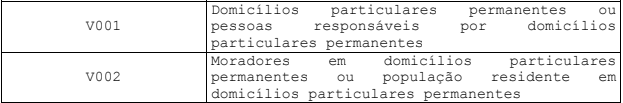

# Upload e tratamento dos dados

Devido ao arquivo utilizado já ter sido limpado e realizado alguns tratamentos. Irei apenas realizar alguns filtros para poder ver a correlação desejada.

In [ ]:
# Importação das bibliotecas que serão utilizadas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Configurações utilizadas para alterar os valores decimais e deixá-los com duas casas após a vírgula

pd.set_option("display.precision", 2)
pd.set_option("display.float_format", lambda x: '%.2f' % x)
sns.set()

In [ ]:
# Atribuindo a base de dados

url = "https://raw.githubusercontent.com/pedrorancura/imersao_alura/main/dados_vendas_censo.csv"
dados_vendas_censo = pd.read_csv(url)

In [ ]:
dados_vendas_censo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5605 entries, 0 to 5604
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rua                    5605 non-null   object 
 1   Bairro                 5597 non-null   object 
 2   Cidade                 5605 non-null   object 
 3   Metragem               5605 non-null   int64  
 4   Quartos                5605 non-null   int64  
 5   Banheiros              5605 non-null   int64  
 6   Vagas                  5605 non-null   int64  
 7   Valor                  5605 non-null   object 
 8   Valor_anuncio          5605 non-null   float64
 9   Tipo_anuncio           0 non-null      float64
 10  Valor_mm               5605 non-null   float64
 11  Valor_m2               5605 non-null   float64
 12  rua                    5605 non-null   object 
 13  cep                    5605 non-null   float64
 14  latitude               5605 non-null   float64
 15  long

In [ ]:
# Filtrando apenas as colunas que serão utilizadas e retirando os valores nulos

dados_vendas_censo = dados_vendas_censo[[
    'Rua', 'Bairro', 'Cidade', 'Metragem', 'Quartos', 'Banheiros', 'Vagas',
    'Valor_anuncio', 'Valor_mm', 'Valor_m2', 'latitude', 'longitude',
    'Situacao_setor', 'V001', 'V002', 'V003', 'V004', 'V005',
    'V006', 'V007', 'V008', 'V009', 'V010', 'V011', 'V012'
]].dropna()

dados_vendas_censo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7.00,7000.00,...,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,3.70,7459.68,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,0.38,3040.00,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,0.54,5400.00,...,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000.00,1.98,4500.00,...,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5599,Rua Pedro Teixeira,Vila Olímpia,São Paulo,157,3,2,2,960000.00,0.96,6114.65,...,2.17,1.27,5054.58,33245189.73,5231.93,33485189.78,3649.06,26562232.53,4551.66,29032823.35
5600,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000.00,1.50,5617.98,...,2.81,1.60,4249.33,24499871.44,5180.14,25047413.33,2618.76,17705032.31,3977.93,21495997.85
5601,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000.00,0.67,7000.00,...,2.99,1.81,2425.09,6878872.25,2543.80,6913867.79,1561.58,4261814.01,2062.09,4596759.57
5603,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000.00,1.05,5121.95,...,2.75,1.50,5650.20,20344622.14,5750.84,20127679.27,3459.68,16021825.60,4362.79,16264378.33


In [ ]:
# Através do gráfico de Boxplot, verificar os Outliers existentes

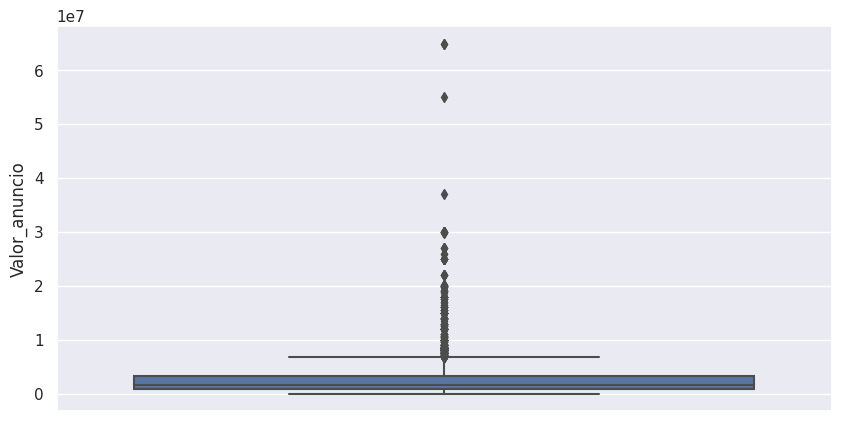

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(dados_vendas_censo, y='Valor_anuncio')
plt.show()

**Observação**: Podemos verificar que entre os valores dos anúncios de imóveis na cidade de São Paulo, há alguns que se sobressaem em relação aos outros. Devido à quantidade de dados estar acima do limite máximo, não podemos descartá-los pois existem imóveis que possuem um preço mais elevado dependendo de alguns fatores que vamos verificar mais adiante. Portanto, vamos retirar apenas aqueles que estão discrepantes referente à quantidade e seu devido valor.

In [ ]:
# Limitar os dados para apenas aqueles imóveis que estão abaixo de 30 milhões e acima de 100 mil reais, retirando-os da base de dados

dados_vendas_censo.drop(dados_vendas_censo.query("Valor_anuncio > 30000000 | Valor_anuncio < 100000").index, inplace=True)

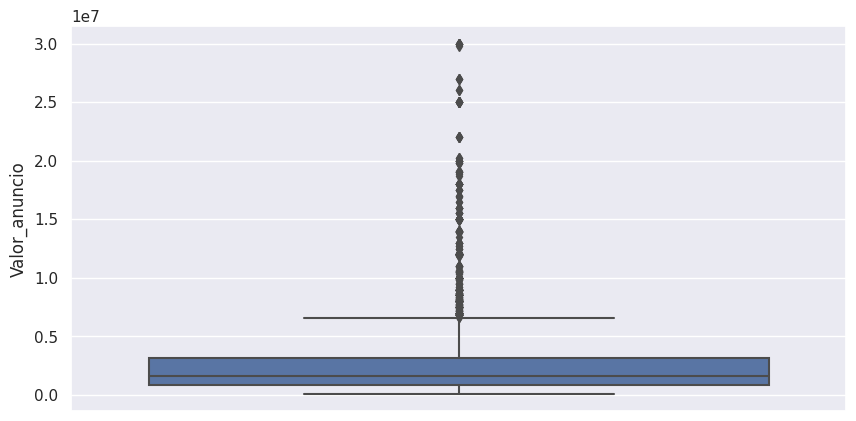

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(dados_vendas_censo, y='Valor_anuncio')
plt.show()

# Validando os dados através de gráficos

Através do gráfico **scatterplot**, iremos verificar a distribuição que se encontram os dados quando realizamos uma relação entre **Valor do Imóvel** x **Valor do m2**.

<Axes: xlabel='Valor_anuncio', ylabel='Valor_m2'>

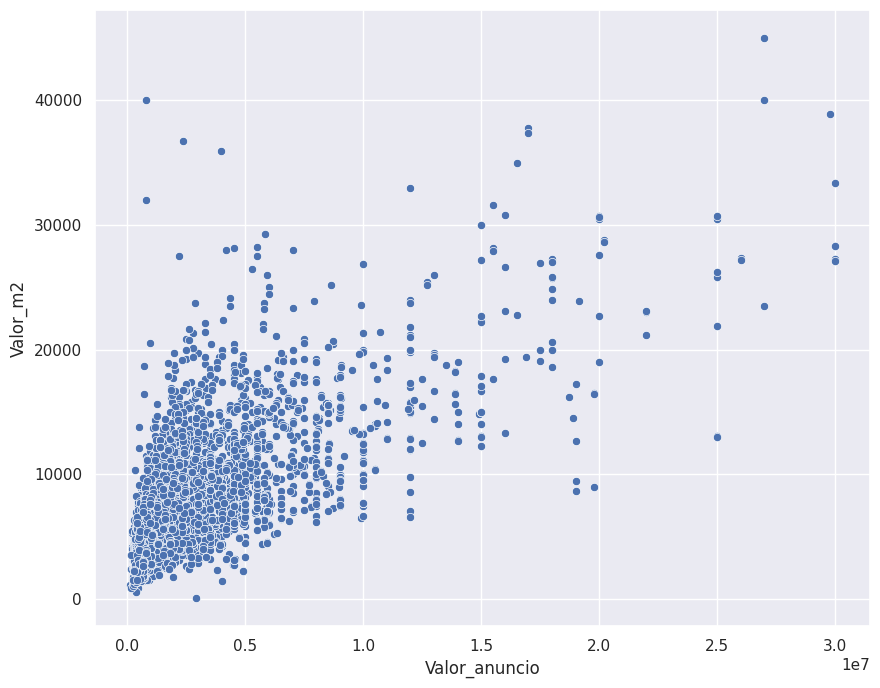

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(dados_vendas_censo, x='Valor_anuncio', y='Valor_m2')

**Conclusão Prévia**: Até o momento, podemos verificar que o gráfico se torna praticamente um cone. Onde há imóveis que são mais baratos porém possuem uma metragem alta (realizando a divisão entre Valor_anuncio / Valor_m2, sabemos a metragem do local), da mesma forma que há imóveis que são caros porém possuem uma metragem relativamente baixa pelo seu valor. De forma geral, mesmo a escala estando alta, podemos observar que a maior parte dos imóveis se encontra entre 5 milhões e 100 mil reais. Devido à variação do valor do metro quadrado em relação ao valor do imóvel, não da para concluir que o valor do imóvel se dá pela sua metragem, assim teremos que verificar outros fatores que influenciam para poder validar.

# Relações

No pandas existe uma função que nos ajuda a ver correlação entre duas variáveis e o quanto elas se aproximam. Os valores vão de 1 até -1, sendo que quanto mais próximo de 1 mais proporcionais ela são e quanto mais próximo de -1 mais inversamente proporcionais essas variáveis são.

**Código das Variáveis**

***Situação_setor***:
- Código de situação do setor
- Situação urbana – códigos: 1, 2 e 3
- 1- Área urbanizada de cidade ou vila
- 2- Área não-urbanizada de cidade ou vila
- 3- Área urbana isolada
- Situação rural – códigos: 4, 5, 6, 7 e 8
- 4- Aglomerado rural de extensão urbana
- 5- Aglomerado rural isolado – povoado
- 6- Aglomerado rural isolado – núcleo
- 7- Aglomerado rural isolado - outros aglomerados
- 8- Zona rural, exclusive aglomerado rural

**Código das Variáveis**

1. **V001** - Domicílios particulares permanentes ou pessoas responsáveis por domicílios particulares permanentes.

2. **V002** - Moradores em domicílios particulares permanentes ou população residente em domicílios particulares permanentes.

3. **V003** - Média do número de moradores em domicílios particulares permanentes (obtida pela divisão de Var2 por Var1).

4. **V004** - Variância do número de moradores em domicílios particulares permanentes.

5. **V005** - Valor do rendimento nominal médio mensal das pessoas responsáveis por domicílios particulares permanentes (com e sem rendimento).

6. **V006** - Variância do rendimento nominal mensal das pessoas responsáveis por domicílios particulares permanentes (com e sem rendimento).

7. **V007** - Valor do rendimento nominal médio mensal das pessoas responsáveis por domicílios particulares permanentes (com rendimento).

8. **V008** - Variância do rendimento nominal mensal das pessoas responsáveis por domicílios particulares permanentes (com rendimento).

9. **V009** - Valor do rendimento nominal médio mensal das pessoas de 10 anos ou mais de idade (com e sem rendimento).

10. **V010** - Variância do rendimento nominal mensal das pessoas de 10 anos ou mais de idade (com e sem rendimento).

11. **V011** - Valor do rendimento nominal médio mensal das pessoas de 10 anos ou mais de idade (com rendimento).

12. **V012** - Variância do rendimento nominal mensal das pessoas de 10 anos ou mais de idade (com rendimento).

In [ ]:
dados_vendas_censo.corr()

<ipython-input-13-4ac884080872>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dados_vendas_censo.corr()


,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,latitude,longitude,Situacao_setor,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
Metragem,1.00,0.23,0.23,0.27,0.30,0.30,0.06,-0.09,-0.13,0.48,...,0.13,0.05,0.22,0.07,0.23,0.05,0.20,0.07,0.21,0.05
Quartos,0.23,1.00,0.55,0.42,0.37,0.37,0.12,-0.01,-0.19,-0.01,...,0.16,0.07,0.32,0.12,0.33,0.11,0.31,0.13,0.32,0.11
Banheiros,0.23,0.55,1.00,0.46,0.47,0.47,0.22,-0.03,-0.25,-0.03,...,0.21,0.07,0.41,0.11,0.41,0.08,0.39,0.11,0.40,0.08
Vagas,0.27,0.42,0.46,1.00,0.48,0.48,0.15,-0.04,-0.19,-0.01,...,0.24,0.09,0.34,0.11,0.34,0.08,0.32,0.12,0.33,0.09
Valor_anuncio,0.30,0.37,0.47,0.48,1.00,1.00,0.70,0.02,-0.21,-0.00,...,0.13,0.08,0.45,0.11,0.45,0.07,0.47,0.13,0.45,0.08
Valor_mm,0.30,0.37,0.47,0.48,1.00,1.00,0.70,0.02,-0.21,-0.00,...,0.13,0.08,0.45,0.11,0.45,0.07,0.47,0.13,0.45,0.08
Valor_m2,0.06,0.12,0.22,0.15,0.70,0.70,1.00,0.05,-0.18,-0.03,...,-0.13,0.01,0.29,0.04,0.28,0.02,0.37,0.05,0.32,0.02
latitude,-0.09,-0.01,-0.03,-0.04,0.02,0.02,0.05,1.00,0.15,-0.03,...,-0.05,0.03,-0.05,-0.09,-0.07,-0.07,-0.04,-0.07,-0.07,-0.06
longitude,-0.13,-0.19,-0.25,-0.19,-0.21,-0.21,-0.18,0.15,1.00,-0.01,...,-0.05,0.02,-0.36,-0.10,-0.36,-0.07,-0.38,-0.10,-0.37,-0.07
Situacao_setor,0.48,-0.01,-0.03,-0.01,-0.00,-0.00,-0.03,-0.03,-0.01,1.00,...,0.03,0.00,-0.03,-0.01,-0.03,-0.01,-0.04,-0.01,-0.03,-0.00


<ipython-input-14-c68c47b45de5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(dados_vendas_censo.corr(), dtype=bool)) # máscara para tirar as relações repetidas
<ipython-input-14-c68c47b45de5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(dados_vendas_censo.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG') # gráfico de heatmap


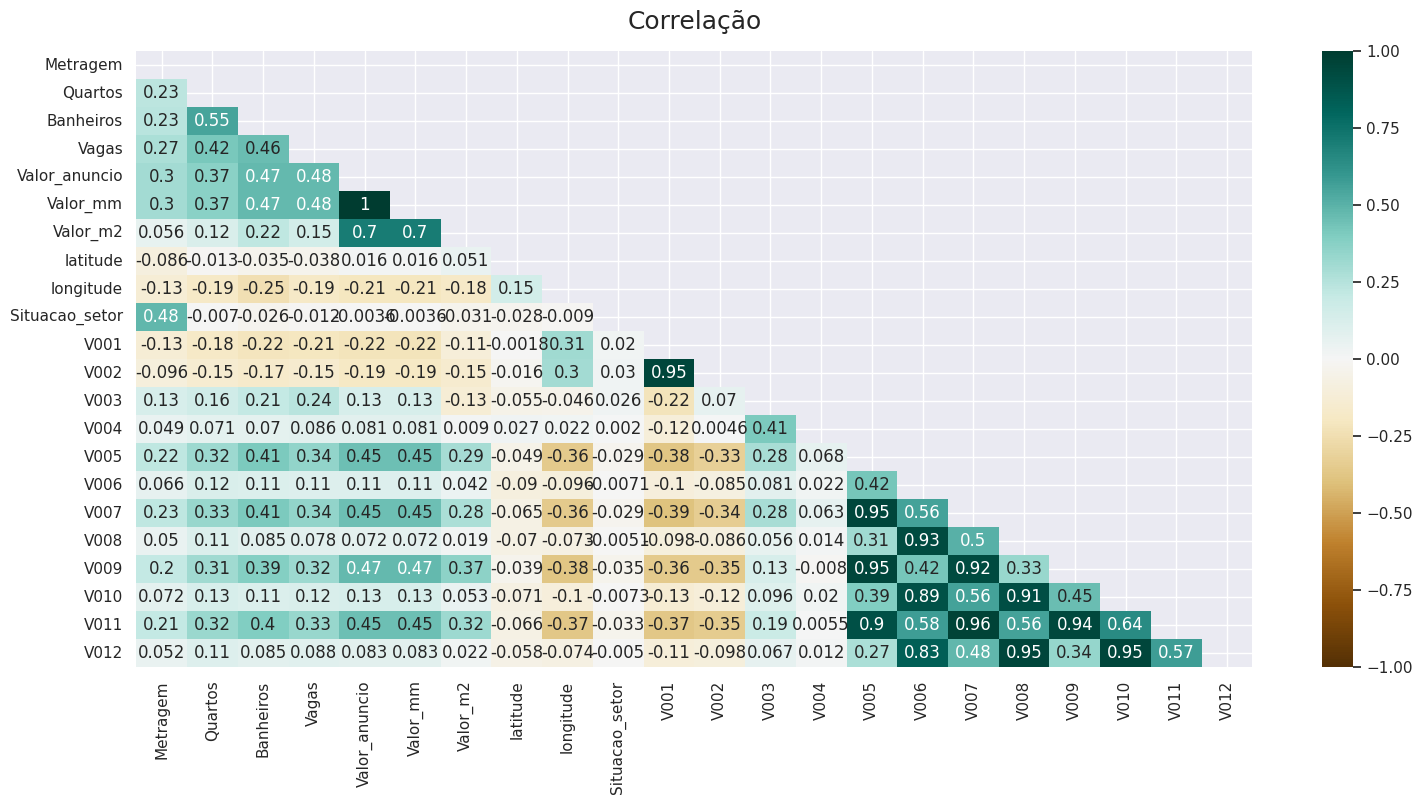

In [ ]:
plt.figure(figsize=(18,8))
mask = np.triu(np.ones_like(dados_vendas_censo.corr(), dtype=bool)) # máscara para tirar as relações repetidas
heatmap = sns.heatmap(dados_vendas_censo.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG') # gráfico de heatmap
heatmap.set_title("Correlação", fontdict={'fontsize':18}, pad=16);

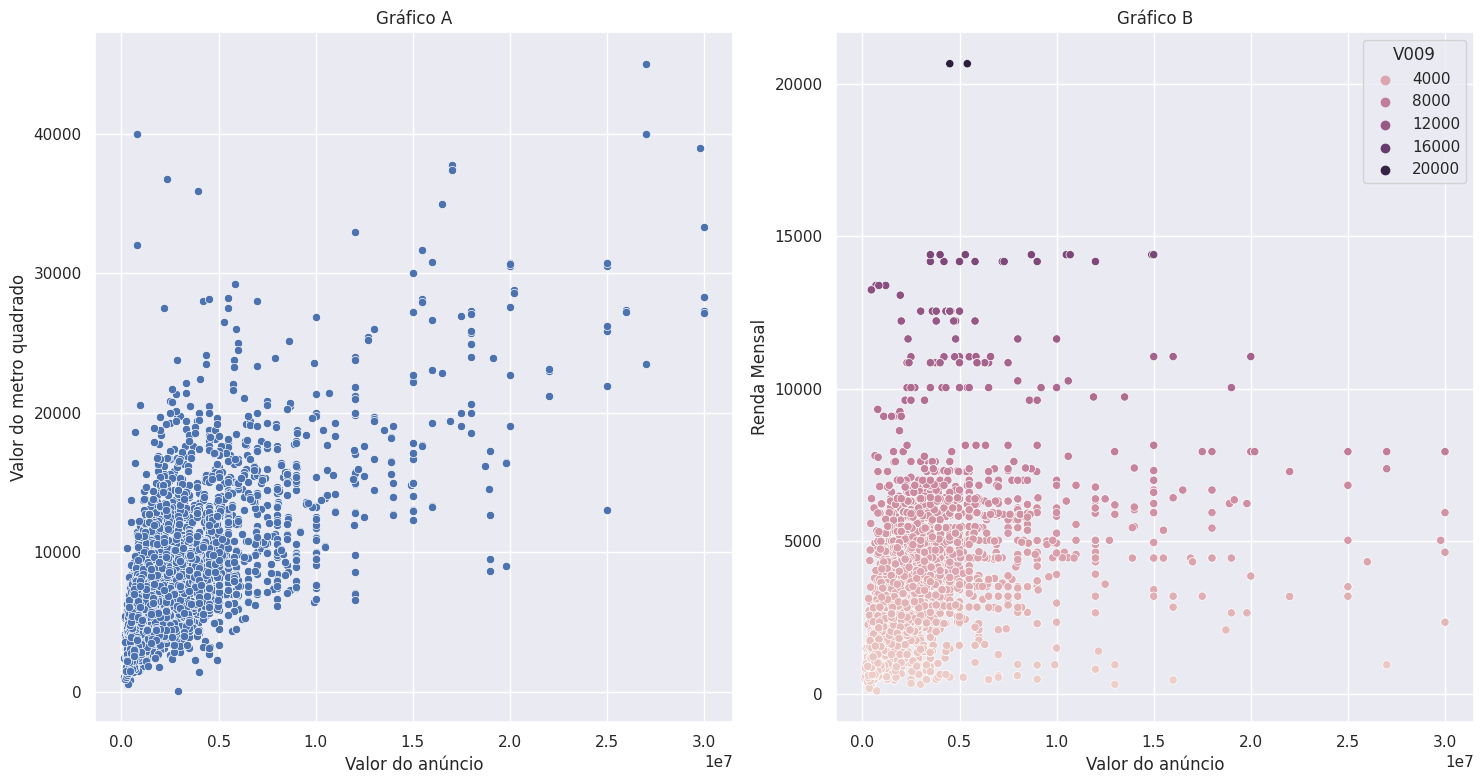

In [31]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.scatterplot(dados_vendas_censo, x='Valor_anuncio', y='Valor_m2') # gráfico Valor_m2 X Valor_anuncio
plt.ylabel('Valor do metro quadrado')
plt.xlabel('Valor do anúncio')
plt.title('Gráfico A')

plt.subplot(1,2,2)
sns.scatterplot(data=dados_vendas_censo, x='Valor_anuncio', y='V009', hue='V009', marker='o') # gráfico Renda X Valor_anuncio
plt.ylabel('Renda Mensal')
plt.xlabel('Valor do anúncio')
plt.title('Gráfico B')

plt.tight_layout() # evitar sobreposição
plt.show()

Text(0.5, 0, 'Tipo de Setor')

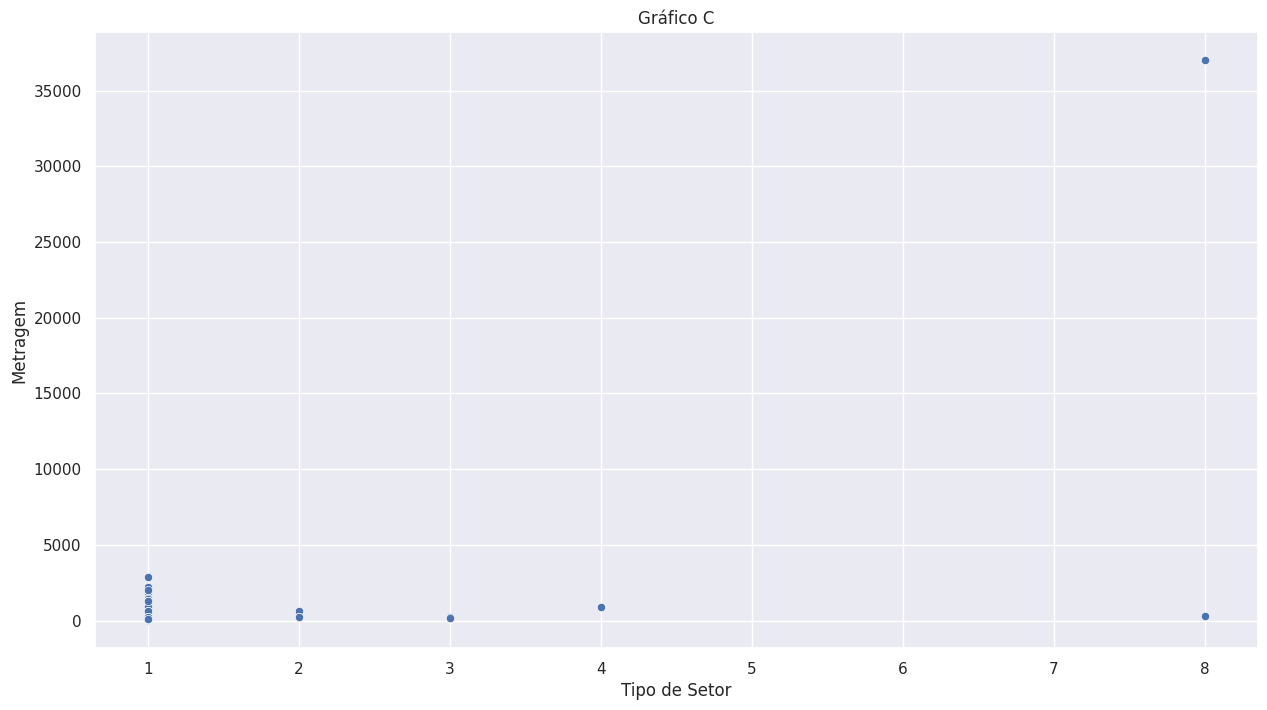

In [30]:
plt.figure(figsize=(15,8))
sns.scatterplot(dados_vendas_censo, x='Situacao_setor', y='Metragem') # gráfico do do valor de metragem pela localização
plt.title('Gráfico C')
plt.xlabel('Tipo de Setor')

# **Conclusão**

* Como havia sido discutido na conclusão anterior, o gráfico A que compõem o
valor do metro quadrado em relação ao valor do anúncio, nos mostra que não podemos validar a metragem como a única variável, pois mesmo o imóvel tendo o mesmo valor, a metragem pode ser diferente asssim como mesmo imóveis tendo a mesma metragem, o valor pode ser diferente.

* Com a plotagem do gráfico B, verificamos que há uma certa semelhança entre como os gráficos A e B se comportam principalmente em locais cujo valor do imóvel varia de 100 mil a 5 milhões. Porém não podemos assumir que locais cuja renda é baixa, todos os imóveis terão valores baixos, e isto junto à metragem, pode nos trazer explicações. Como por exemplo, lugares com renda média baixa e valores de imóveis altos, possuem uma metragem alta resultando no valor do anúncio.

* Para o gráfico C, podemos verificar que a maior parte dos imóveis realmente se encontram em áreas urbanas, havendo uma pequena parte que se encontra em áres urbanas afastadas ou áreas rurais (é possível verificar principalmente pela metragem do imóvel).